In [1]:
import sys
import os
# sys.path.append('/home/beinhaud/diplomka/mcs-source/evaluation_tools')
sys.path.append('/home/david/source/diplomka/nn_model')

from enum import Enum
import pickle

import pandas as pd

from nn_model.evaluation_metrics import NormalizedCrossCorrelation
from nn_model.type_variants import EvaluationFields

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
total_neurons = 108150

ratios = [0.003, 0.01, 0.013, 0.1, 0.11]

for ratio in ratios:
    print(f"Ratio {ratio}: {total_neurons*ratio}")

Ratio 0.003: 324.45
Ratio 0.01: 1081.5
Ratio 0.013: 1405.95
Ratio 0.1: 10815.0
Ratio 0.11: 11896.5


In [3]:
class ModelVariants(Enum):
    SIMPLE_10 = "simple_10.0"
    DNN_10 = "dnn_10.0"
    SYN_ADAPT_10 = "syn_adapt_10.0"
    SIZE_0_3 = "model_0.3"
    SIZE_1 = "model_1.0."
    SIZE_10 = "syn_adapt_10.0."
    SIZE_1_3_VIS_33 = "model_1.3_visible_0.33"
    SIZE_2_VIS_50 = "model_2.0_visible_0.5"
    SIZE_11_VIS_90 = "model_11.0_visible_0.9"
    
class ModelResults:
    def __init__(self, name: str, dir: str, cc_norm: float, cc_single_trial: float, cc_abs: float):
        self.name = name
        self.dir = dir
        self.cc_norm = cc_norm
        self.cc_single_trial = cc_single_trial
        self.cc_abs = cc_abs
        
class EvaluationVariants(Enum):
    CC_NORM = "Normalized CC"
    CC_SEPARATE = "Single Trial Pearson CC" 
    CC_ABS = "Pearson CC"
    SIZE_COMPARISON = "Normalized CC by Neuron Count"   

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_overall_results(
        df_all: pd.DataFrame, 
        filename: str, 
        models_per_variant: dict[EvaluationVariants, list[str]]
    ):
    # Global font settings
    plt.rcParams.update({
        "font.size": 30,
        "axes.titlesize": 34,
        "axes.labelsize": 32,
        "xtick.labelsize": 30,
        "ytick.labelsize": 30,
        "savefig.dpi": 300
    })

    # Define metrics in desired custom order
    print(models_per_variant)
    evaluation_variants = [k for k in models_per_variant]
    
    xlabels = {
        EvaluationVariants.CC_ABS: "Model Variant",
        EvaluationVariants.CC_SEPARATE: "Model Variant",
        EvaluationVariants.CC_NORM: "Model Variant",
        EvaluationVariants.SIZE_COMPARISON: "Number of Observed Neurons",
    }
    titles = {
        EvaluationVariants.CC_ABS: "Trial-averaged pearson CC",
        EvaluationVariants.CC_SEPARATE: "Singe-trial pearson CC",
        EvaluationVariants.CC_NORM: "Normalized CC",
        EvaluationVariants.SIZE_COMPARISON: "Normalized CC",
    }
    
    # Create a single figure with 3 subplots (side-by-side)
    fig, axes = plt.subplots(1, len(evaluation_variants), figsize=(len(evaluation_variants)*8, 10), sharey=True)
    plt.subplots_adjust(wspace=0)
    
    colorblind_colors = sns.color_palette("colorblind", n_colors=8)

    color_mapping = {
        "Simple": colorblind_colors[0],
        "DNN": colorblind_colors[1],
        "RNN": colorblind_colors[2],
        "324": colorblind_colors[2],
        "1080": colorblind_colors[2],
        "10800": colorblind_colors[2],
    }

    # Plot each metric
    for idx, eval_variant in enumerate(evaluation_variants):
        ax = axes[idx]
        df_variant = df_all[df_all['model_variant'].isin(models_per_variant[eval_variant])]
        
        metric = eval_variant
        if metric == EvaluationVariants.SIZE_COMPARISON:
            # Select Metric variant for Size comparison
            metric = EvaluationVariants.CC_NORM
        
        # Apply the mapping
        unique_variants = df_variant['model_variant'].unique()
        palette = [color_mapping[variant] for variant in unique_variants]


        sns.barplot(
            data=df_variant[['model_variant', metric.value]],
            x='model_variant',
            y=metric.value,
            palette=palette,
            ax=ax,
            width=0.8,
        )

        # Titles and labels
        ax.set_title(titles[eval_variant], fontweight='bold', fontsize=36)
        ax.set_xlabel(xlabels[eval_variant], fontweight='bold', fontsize=30)
        if idx == 0:
            ax.set_ylabel("Correlation Value", fontweight='bold', fontsize=30)
        else:
            ax.set_ylabel("")

        # Tick styling
        ax.set_xticklabels(ax.get_xticklabels(), fontweight='normal', fontsize=28)
        ax.set_yticklabels([f"{tick:.2f}" for tick in ax.get_yticks()], fontweight='normal', fontsize=28)

        # Annotate bars with larger font
        for bar in ax.patches:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 6),
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=26)

        ax.set_ylim(0, 1)

    # Final layout and save
    plt.tight_layout()
    plt.savefig(filename, bbox_inches="tight")
    plt.show()


In [5]:
all_models = {
    ModelVariants.SIMPLE_10: 
        ModelResults(
            "Simple", 
            ModelVariants.SIMPLE_10.value, 
            0.8672341750727759, 
            0.2805, 
            0.7112336999840206
        ),
    ModelVariants.DNN_10: 
        ModelResults(
            "DNN", 
            ModelVariants.DNN_10.value, 
            0.8632245083649953, 
            0.2866, 
            0.7054749210675557
        ),
    ModelVariants.SYN_ADAPT_10: 
        ModelResults(
            "RNN", 
            ModelVariants.SYN_ADAPT_10.value, 
            0.9382373869419098, 
            0.3051, 
            0.7670789413981968
        ),
    ModelVariants.SIZE_0_3:
        ModelResults(
            "324", 
            ModelVariants.SIZE_0_3.value, 
            0.93568704062038, 
            0.27160918447706434, 
            0.7705901947286394
        ),
    ModelVariants.SIZE_1: 
        ModelResults(
            "1080", 
            ModelVariants.SIZE_1.value, 
            0.9361271335019006, 
            0.277725352181328666, 
            0.7677025225427415
        ),
    ModelVariants.SIZE_10: 
        ModelResults(
            "10800", 
            ModelVariants.SIZE_10.value, 
            0.9382373869419098, 
            0.3051, 
            0.7670789413981968
        ),
}

models_per_evaluation_variant = {
    EvaluationVariants.CC_ABS: [
        all_models[ModelVariants.SIMPLE_10].name, 
        all_models[ModelVariants.DNN_10].name, 
        all_models[ModelVariants.SYN_ADAPT_10].name,
    ],
    EvaluationVariants.CC_SEPARATE: [
        all_models[ModelVariants.SIMPLE_10].name, 
        all_models[ModelVariants.DNN_10].name, 
        all_models[ModelVariants.SYN_ADAPT_10].name,
    ],
    EvaluationVariants.CC_NORM: [
        all_models[ModelVariants.SIMPLE_10].name, 
        all_models[ModelVariants.DNN_10].name, 
        all_models[ModelVariants.SYN_ADAPT_10].name,
    ],
    EvaluationVariants.SIZE_COMPARISON: 
    [
        all_models[ModelVariants.SIZE_0_3].name, 
        all_models[ModelVariants.SIZE_1].name, 
        all_models[ModelVariants.SIZE_10].name,
    ],
}

rows = []
# for i in range(len(model_variants)):
for model_values in all_models.values():
    row = {"model_variant": model_values.name,
           EvaluationVariants.CC_NORM.value: model_values.cc_norm,
           EvaluationVariants.CC_ABS.value: model_values.cc_abs,
           EvaluationVariants.CC_SEPARATE.value: model_values.cc_single_trial,
        }
    
    rows.append(row)
    
df = pd.DataFrame(rows)

{<EvaluationVariants.CC_ABS: 'Pearson CC'>: ['Simple', 'DNN', 'RNN'], <EvaluationVariants.CC_SEPARATE: 'Single Trial Pearson CC'>: ['Simple', 'DNN', 'RNN'], <EvaluationVariants.CC_NORM: 'Normalized CC'>: ['Simple', 'DNN', 'RNN'], <EvaluationVariants.SIZE_COMPARISON: 'Normalized CC by Neuron Count'>: ['324', '1080', '10800']}


/tmp/ipykernel_24498/2988041846.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_24498/2988041846.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontweight='normal', fontsize=28)
/tmp/ipykernel_24498/2988041846.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{tick:.2f}" for tick in ax.get_yticks()], fontweight='normal', fontsize=28)
/tmp/ipykernel_24498/2988041846.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_

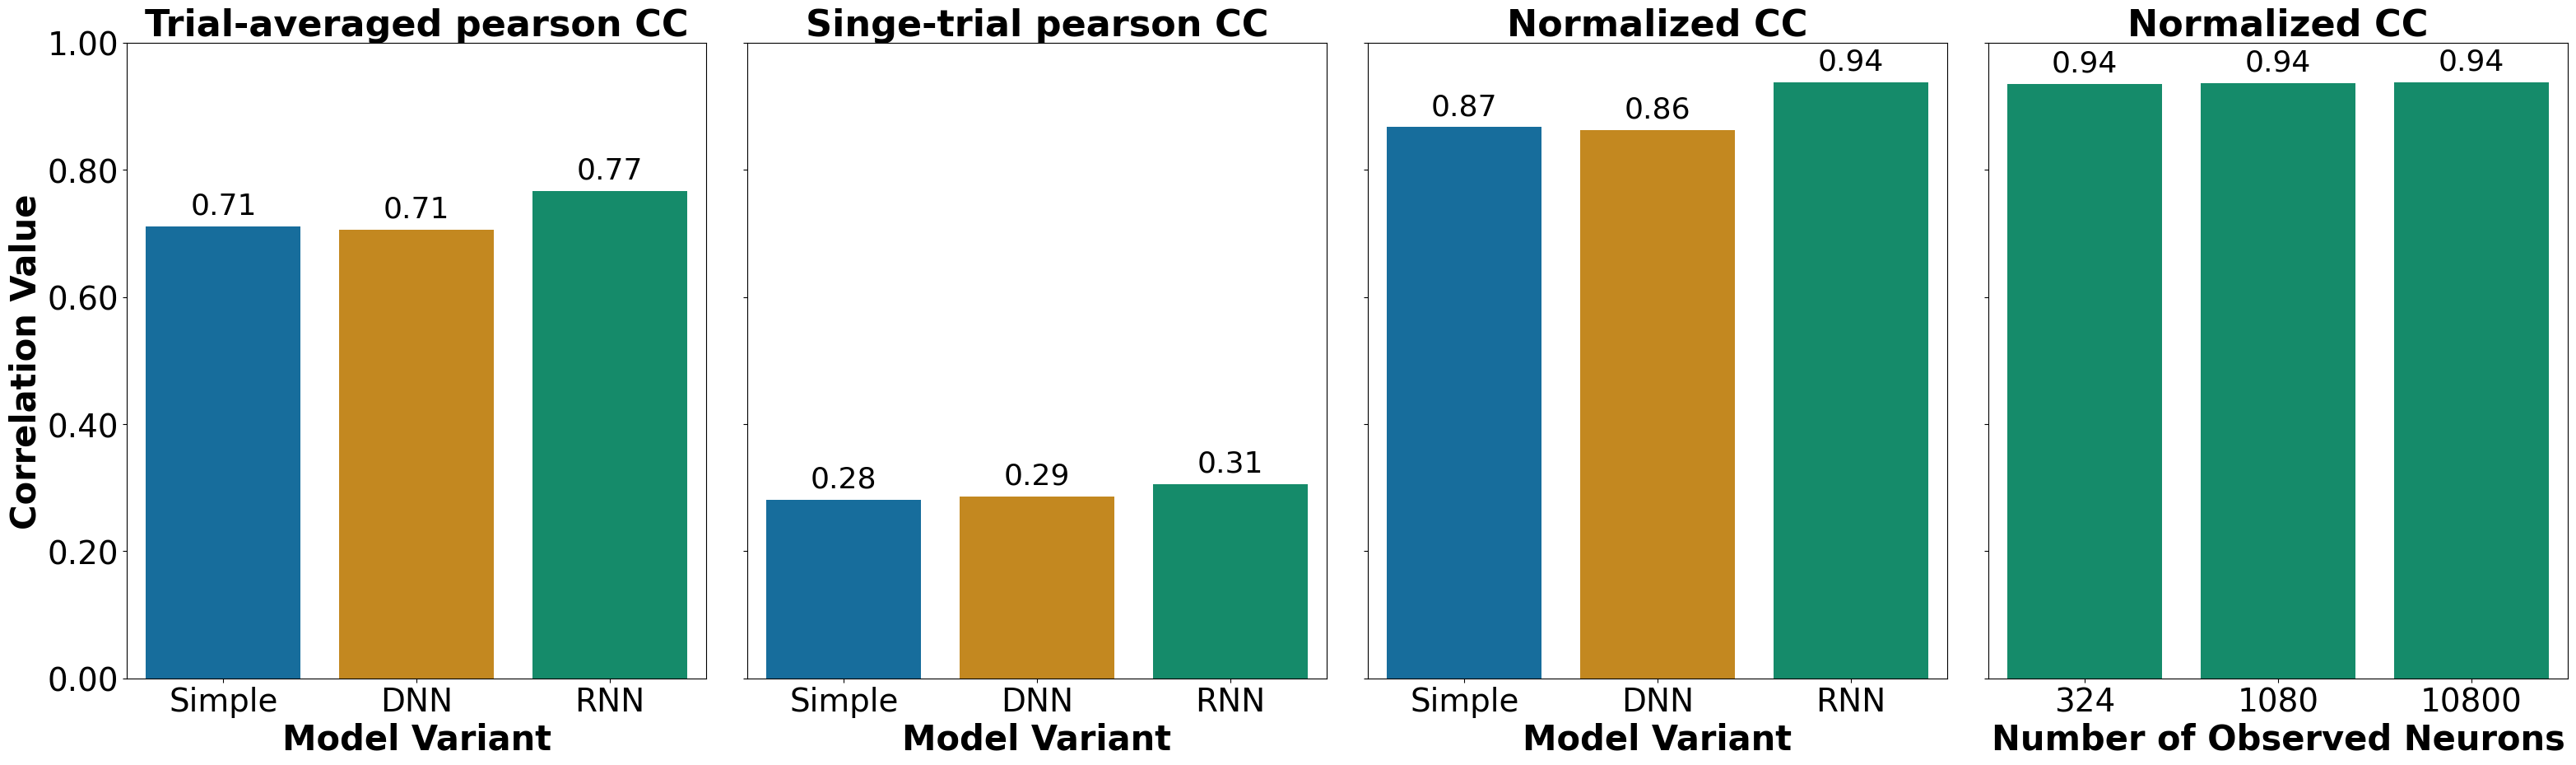

In [6]:
plot_overall_results(df, "poster/combine_barplots.pdf", models_per_evaluation_variant)